In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
...


Using TensorFlow backend.


Ellipsis

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
%matplotlib inline
sns.set()

In [5]:
excel_file = 'train_x.xlsx'
features = pd.read_excel(excel_file)
(features.head())
features.shape

(59999, 196)

In [6]:
excel_file1 = 'train_y.xlsx'
target = pd.read_excel(excel_file1)
(target.head())
target.shape

(59999, 784)

In [7]:
excel_file2 = 'test_x.xlsx'
features1 = pd.read_excel(excel_file2)
(features1.head())
features1.shape

(9999, 196)

In [8]:
excel_file3 = 'test_y.xlsx'
target1 = pd.read_excel(excel_file3) 
(target1.head()) 
target1.shape

(9999, 784)

In [9]:
import matplotlib.image as mpimg

In [10]:
#X_train = features.values.reshape(features.shape[0], 14, 14, 1).astype('float32')
#X_test = features1.values.reshape(features1.shape[0], 14, 14, 1).astype('float32')
features.shape

(59999, 196)

In [11]:
X_train = features.values.reshape(features.shape[0], 14, 14, 1).astype('float32')
X_train.shape


(59999, 14, 14, 1)

In [12]:
b = X_train.squeeze()
b.shape

(59999, 14, 14)

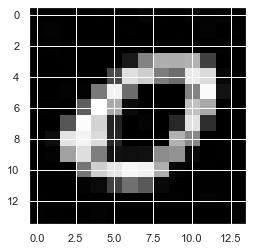

In [13]:
first_image = b[0]
plt.imshow(first_image, cmap = 'gray')
plt.show()

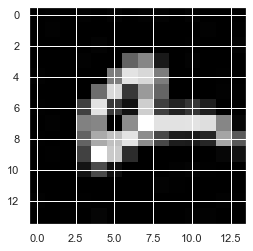

In [14]:
sec_image = b[3]
plt.imshow(sec_image, cmap = 'gray')
plt.show()

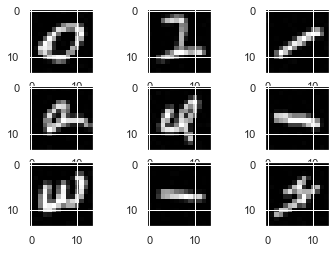

In [15]:
from matplotlib import pyplot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(b[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [16]:
first_image.shape

(14, 14)

In [17]:
X_train = features.values.reshape(features.shape[0], 14, 14, 1).astype('float32')
X_test = features1.values.reshape(features1.shape[0], 14, 14, 1).astype('float32')
import tensorflow as tf
import tensorflow.keras as keras

In [18]:
X_train.shape

(59999, 14, 14, 1)

In [19]:
X_train.shape

(59999, 14, 14, 1)

In [20]:
target.shape

(59999, 784)

In [21]:
target_new = np.array(target)

In [32]:
X_train = features.values.reshape(features.shape[0], 14, 14, 1).astype('float32')
X_test = features1.values.reshape(features1.shape[0], 14, 14, 1).astype('float32')
import tensorflow as tf
import tensorflow.keras as keras

In [33]:
import tensorflow as tf
import tensorflow.keras as keras
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Conv2DTranspose, Reshape, Lambda

In [34]:
def baseline_model():
    model = tf.keras.Sequential()
    model.add(Conv2DTranspose(filters=12, kernel_size=(3, 3),padding='valid', activation='relu',
                              input_shape=(14,14,1)))
    model.add(Conv2DTranspose(filters=12, kernel_size=(5, 5), activation='relu'))
    model.add(Conv2DTranspose(filters=12, kernel_size=(7, 7), activation='relu'))
    model.add(Conv2DTranspose(filters=12, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2DTranspose(filters=1, kernel_size=(1, 1), activation='relu'))
    model.add(Lambda(lambda x: tf.keras.backend.squeeze(x, 3)))
    model.add(Flatten())
    model.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9))
    return model
   

In [35]:
model = baseline_model()                          

In [36]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_20 (Conv2DT (None, 16, 16, 12)        120       
_________________________________________________________________
conv2d_transpose_21 (Conv2DT (None, 20, 20, 12)        3612      
_________________________________________________________________
conv2d_transpose_22 (Conv2DT (None, 26, 26, 12)        7068      
_________________________________________________________________
conv2d_transpose_23 (Conv2DT (None, 28, 28, 12)        1308      
_________________________________________________________________
conv2d_transpose_24 (Conv2DT (None, 28, 28, 1)         13        
_________________________________________________________________
lambda_4 (Lambda)            (None, 28, 28)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)              

In [37]:
model = baseline_model()
history = model.fit(X_train, target_new,validation_split = 0.2, epochs=200, batch_size = 50, verbose = 2)

Train on 47999 samples, validate on 12000 samples
Epoch 1/200
47999/47999 - 50s - loss: 0.0723 - val_loss: 0.0661
Epoch 2/200
47999/47999 - 50s - loss: 0.0638 - val_loss: 0.0615
Epoch 3/200
47999/47999 - 50s - loss: 0.0592 - val_loss: 0.0572
Epoch 4/200
47999/47999 - 51s - loss: 0.0550 - val_loss: 0.0533
Epoch 5/200
47999/47999 - 53s - loss: 0.0512 - val_loss: 0.0496
Epoch 6/200
47999/47999 - 53s - loss: 0.0478 - val_loss: 0.0465
Epoch 7/200
47999/47999 - 49s - loss: 0.0451 - val_loss: 0.0442
Epoch 8/200
47999/47999 - 50s - loss: 0.0431 - val_loss: 0.0424
Epoch 9/200
47999/47999 - 50s - loss: 0.0415 - val_loss: 0.0409
Epoch 10/200
47999/47999 - 52s - loss: 0.0401 - val_loss: 0.0397
Epoch 11/200
47999/47999 - 54s - loss: 0.0389 - val_loss: 0.0385
Epoch 12/200
47999/47999 - 50s - loss: 0.0378 - val_loss: 0.0374
Epoch 13/200
47999/47999 - 49s - loss: 0.0368 - val_loss: 0.0365
Epoch 14/200
47999/47999 - 50s - loss: 0.0359 - val_loss: 0.0356
Epoch 15/200
47999/47999 - 50s - loss: 0.0351 - v

47999/47999 - 3019s - loss: 0.0176 - val_loss: 0.0175
Epoch 127/200
47999/47999 - 49s - loss: 0.0175 - val_loss: 0.0175
Epoch 128/200
47999/47999 - 51s - loss: 0.0175 - val_loss: 0.0174
Epoch 129/200
47999/47999 - 52s - loss: 0.0174 - val_loss: 0.0173
Epoch 130/200
47999/47999 - 52s - loss: 0.0174 - val_loss: 0.0173
Epoch 131/200
47999/47999 - 49s - loss: 0.0173 - val_loss: 0.0172
Epoch 132/200
47999/47999 - 51s - loss: 0.0173 - val_loss: 0.0172
Epoch 133/200
47999/47999 - 51s - loss: 0.0172 - val_loss: 0.0172
Epoch 134/200
47999/47999 - 51s - loss: 0.0172 - val_loss: 0.0171
Epoch 135/200
47999/47999 - 49s - loss: 0.0171 - val_loss: 0.0170
Epoch 136/200
47999/47999 - 50s - loss: 0.0171 - val_loss: 0.0170
Epoch 137/200
47999/47999 - 50s - loss: 0.0170 - val_loss: 0.0172
Epoch 138/200
47999/47999 - 52s - loss: 0.0170 - val_loss: 0.0173
Epoch 139/200
47999/47999 - 51s - loss: 0.0169 - val_loss: 0.0168
Epoch 140/200
47999/47999 - 50s - loss: 0.0169 - val_loss: 0.0168
Epoch 141/200
47999/47

In [38]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


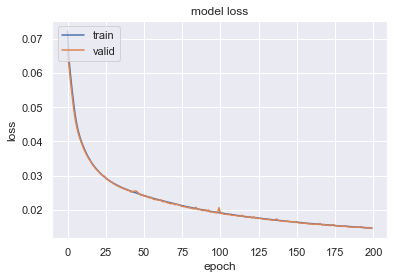

In [39]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [40]:
train_loss = model.evaluate(X_train, target_new,verbose = 2)
print("Training MSE: {}".format(train_loss))

59999/1 - 26s - loss: 0.0159
Training MSE: 0.014597662622247048


In [55]:
Y_TEST = np.array(target1)

In [56]:
test_loss = model.evaluate(X_test, target_new1,verbose = 2)
print("Testing MSE: {}".format(test_loss))

9999/1 - 4s - loss: 0.0132
Testing MSE: 0.014206127844995284


In [43]:
# saving model
model.save("new.SUP")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: new.SUP\assets


In [57]:
X_test.shape

(9999, 14, 14, 1)

In [58]:
# making predictions 
predictions = model.predict([X_test])  

In [59]:
predictions.shape

(9999, 784)

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
# Model error
ERROR = mean_squared_error(Y_TEST, predictions)
print("Model Mean Squared Error: {}".format(ERROR))

Model Mean Squared Error: 0.014206128018204473


In [63]:
Pre = np.expand_dims(predictions, axis=2)

In [64]:
Pre.shape

(9999, 784, 1)

In [65]:
PRE = Pre.reshape(Pre.shape[0], 28, 28, 1).astype('float32')

In [66]:
PRE.shape

(9999, 28, 28, 1)

In [67]:
a = PRE.squeeze()
a.shape

(9999, 28, 28)

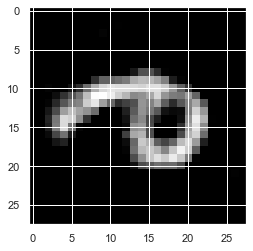

In [68]:
SR_image = a[20]
plt.imshow(SR_image,cmap = 'gray')
plt.show()

In [69]:
SR_image.shape

(28, 28)

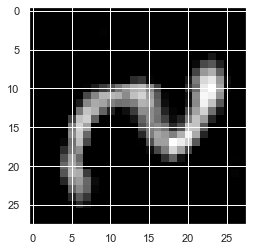

In [71]:
SR_IMage = a[22]
plt.imshow(SR_IMage,cmap = 'gray')
plt.show()

C:\Users\abhil\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


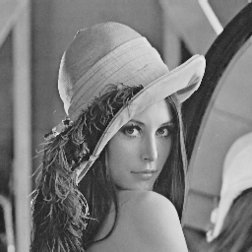

In [100]:
img

In [101]:
img.size

(252, 252)

In [102]:
img_array = img_to_array(img)

In [103]:
img_array.shape

(252, 252, 1)

In [104]:
save_img('new.png', img_array)

In [105]:
img = load_img('new.png')

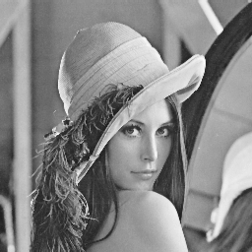

In [106]:
img

In [107]:
h, w, _ = img_array.shape

In [108]:
factor = 18
new_height = int(h / factor)
new_width = int( w / factor)

In [109]:
new_height,new_width

(14, 14)

In [110]:
IMAGE = cv2.resize(img_array, (new_width, new_height), interpolation = cv2.INTER_LINEAR)

In [111]:
IMAGE.size

196

In [112]:
#IMAGE_array = np.expand_dims(IMAGE, axis=2)
IMAGE_array = img_to_array(IMAGE)

In [113]:
IMAGE_array.shape

(14, 14, 1)

In [114]:
IMAGE_array.shape

(14, 14, 1)

In [115]:
IMAGE_array = IMAGE_array.reshape((-1, 14, 14, 1))

In [116]:
IMAGE_array.shape

(1, 14, 14, 1)

In [117]:
SUPER_image = new_model.predict([IMAGE_array]) 

In [118]:
SUPER_image.shape

(1, 784)

In [119]:
SUPER = SUPER_image.reshape(SUPER_image.shape[0], 1, 28, 28).astype('float32')

In [120]:
SUPER.shape

(1, 1, 28, 28)

In [121]:
SUPER = SUPER_image.reshape(SUPER_image.shape[0], 1, 28, 28).astype('float32')

In [122]:
SUPER.shape

(1, 1, 28, 28)

In [123]:
F = SUPER.squeeze()
F.shape

(28, 28)

In [124]:
K = np.expand_dims(F, axis=2)
K.shape

(28, 28, 1)

In [125]:
h_N, w_N, _ = K.shape

In [126]:
factor = 5
NEW_height = h_N * factor
NEW_width =  w_N* factor

In [127]:
NEW_height, NEW_width

(140, 140)

In [128]:
IMAGE1 = cv2.resize(K, (NEW_width, NEW_height), interpolation = cv2.INTER_LINEAR)

(140, 140)